<a href="https://colab.research.google.com/github/mehri-satari/Data-Mining-Course-Project/blob/main/Assignment_4_INFO_5731.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:

*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


In [ ]:
# Common setup cell (optional but helpful)
!pip install pandas numpy matplotlib scikit-learn gensim bertopic sentence-transformers umap-learn hdbscan


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 13.1 MB/s eta 0:00:00


Sampled 2000 documents
Dictionary size: 2564

=== Training models for K=5 ===
LDA coherence (c_v): 0.453
LSA coherence (c_v): 0.416

=== Training models for K=10 ===
LDA coherence (c_v): 0.446
LSA coherence (c_v): 0.408

=== Training models for K=15 ===
LDA coherence (c_v): 0.453
LSA coherence (c_v): 0.436

=== Training models for K=20 ===
LDA coherence (c_v): 0.483
LSA coherence (c_v): 0.413


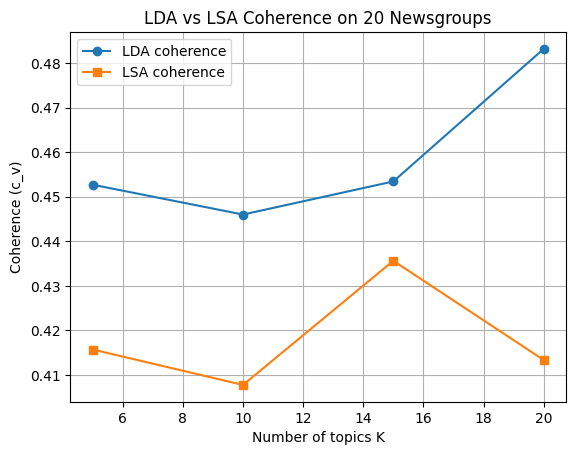


Best K based on coherence:
LDA best K: 20 with coherence 0.483
LSA best K: 15 with coherence 0.436

Top 10 words per topic for LDA (K=20):
Topic 00: you, are, this, your, not, file, with, from, will, program
Topic 01: appears, art, cover, man, new, black, each, com, appear, cable
Topic 02: you, not, they, this, have, was, what, but, are, there
Topic 03: dos, this, have, would, advertising, with, just, out, anyone, also
Topic 04: are, armenian, with, turkish, university, this, new, genocide, turks, history
Topic 05: this, van, any, does, you, some, can, thanks, with, use
Topic 06: with, you, this, have, administration, will, official, about, russian, are
Topic 07: anyone, thanks, know, but, can, please, has, does, advance, will
Topic 08: will, team, game, but, have, not, are, last, with, year
Topic 09: can, with, are, this, have, you, any, please, mail, from
Topic 10: data, edu, search, you, graphics, software, information, internet, have, ibm
Topic 11: with, was, who, from, this, ther

In [ ]:
# Q1: LDA & LSA on 20 Newsgroups (Random 2000 docs)

import random
import re
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from gensim import corpora
from gensim.models import LdaModel, LsiModel
from gensim.models.coherencemodel import CoherenceModel

# 1. Load 20 Newsgroups and sample 2000 documents
newsgroups = fetch_20newsgroups(
    subset="all",
    remove=("headers", "footers", "quotes")
)
all_docs = newsgroups.data
random.seed(42)
sample_idx = random.sample(range(len(all_docs)), 2000)
docs_20ng = [all_docs[i] for i in sample_idx]

print(f"Sampled {len(docs_20ng)} documents")

# 2. Simple preprocessing for topic modeling
def simple_preprocess(doc):
    # Keep only letters, lowercase, remove very short tokens
    doc = re.sub(r"[^a-zA-Z]", " ", doc)
    tokens = [w for w in doc.lower().split() if len(w) > 2]
    return tokens

tokenized_docs_20ng = [simple_preprocess(doc) for doc in docs_20ng]

# 3. Build dictionary and corpus for gensim
dictionary_20 = corpora.Dictionary(tokenized_docs_20ng)
dictionary_20.filter_extremes(no_below=10, no_above=0.5)
corpus_20 = [dictionary_20.doc2bow(text) for text in tokenized_docs_20ng]

print(f"Dictionary size: {len(dictionary_20)}")

# 4. Helper functions: train LDA/LSA and compute coherence
def train_lda_lsa(k, corpus, dictionary):
    lda = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=k,
        random_state=42,
        passes=10,
        chunksize=2000,
        alpha="auto",
        per_word_topics=False
    )

    lsa = LsiModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=k
    )
    return lda, lsa


def compute_coherence(model, texts, dictionary, topn=10, coherence="c_v"):
    topics_words = []
    for t in range(model.num_topics):
        words = [w for w, _ in model.show_topic(t, topn=topn)]
        topics_words.append(words)

    cm = CoherenceModel(
        topics=topics_words,
        texts=texts,
        dictionary=dictionary,
        coherence=coherence
    )
    return cm.get_coherence()


# 5. Try different K values and compute coherence
k_values = [5, 10, 15, 20]
lda_scores = []
lsa_scores = []

for k in k_values:
    print(f"\n=== Training models for K={k} ===")
    lda_k, lsa_k = train_lda_lsa(k, corpus_20, dictionary_20)

    coh_lda = compute_coherence(lda_k, tokenized_docs_20ng, dictionary_20)
    coh_lsa = compute_coherence(lsa_k, tokenized_docs_20ng, dictionary_20)

    lda_scores.append(coh_lda)
    lsa_scores.append(coh_lsa)

    print(f"LDA coherence (c_v): {coh_lda:.3f}")
    print(f"LSA coherence (c_v): {coh_lsa:.3f}")

# 6. Plot coherence vs K
plt.figure()
plt.plot(k_values, lda_scores, marker="o", label="LDA coherence")
plt.plot(k_values, lsa_scores, marker="s", label="LSA coherence")
plt.xlabel("Number of topics K")
plt.ylabel("Coherence (c_v)")
plt.title("LDA vs LSA Coherence on 20 Newsgroups")
plt.legend()
plt.grid(True)
plt.show()

# 7. Pick best K for each model
best_k_lda = k_values[int(np.argmax(lda_scores))]
best_k_lsa = k_values[int(np.argmax(lsa_scores))]

print("\nBest K based on coherence:")
print(f"LDA best K: {best_k_lda} with coherence {max(lda_scores):.3f}")
print(f"LSA best K: {best_k_lsa} with coherence {max(lsa_scores):.3f}")

# 8. Train final models with best K and print topics
lda_final, _ = train_lda_lsa(best_k_lda, corpus_20, dictionary_20)
_, lsa_final = train_lda_lsa(best_k_lsa, corpus_20, dictionary_20)


def print_topics(model, model_name, topn=10):
    print(f"\nTop {topn} words per topic for {model_name}:")
    for t in range(model.num_topics):
        terms = [w for w, _ in model.show_topic(t, topn=topn)]
        print(f"Topic {t:02d}: {', '.join(terms)}")


print_topics(lda_final, f"LDA (K={best_k_lda})")
print_topics(lsa_final, f"LSA (K={best_k_lsa})")


# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

2025-11-15 14:54:58,492 - BERTopic - Embedding - Transforming documents to embeddings.


Final number of documents used: 450


Batches:   0%|          | 0/15 [00:00<?, ?it/s]

2025-11-15 14:55:41,636 - BERTopic - Embedding - Completed ✓
2025-11-15 14:55:41,637 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-15 14:55:42,644 - BERTopic - Dimensionality - Completed ✓
2025-11-15 14:55:42,645 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-15 14:55:42,678 - BERTopic - Cluster - Completed ✓
2025-11-15 14:55:42,679 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-11-15 14:55:42,920 - BERTopic - Representation - Completed ✓
2025-11-15 14:55:42,922 - BERTopic - Topic reduction - Reducing number of topics
2025-11-15 14:55:42,924 - BERTopic - Topic reduction - Number of topics (10) is equal or higher than the clustered topics(2).
2025-11-15 14:55:42,926 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-15 14:55:43,201 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,0,17,0_quantum_learn_machin_machin learn,"[quantum, learn, machin, machin learn, comput,...",[use quantum comput machin learn among excit p...
1,1,433,1_learn_machin_machin learn_data,"[learn, machin, machin learn, data, model, use...",[demand artifici intellig grown significantli ...



=== BERTopic with K=5 ===
Coherence = 0.5258

=== BERTopic with K=10 ===
Coherence = 0.5258

=== BERTopic with K=15 ===
Coherence = 0.5258

=== BERTopic with K=20 ===
Coherence = 0.5258


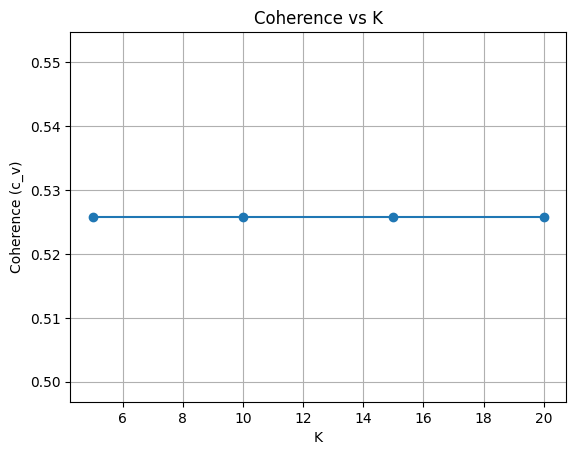

2025-11-15 14:58:52,244 - BERTopic - Embedding - Transforming documents to embeddings.



Best K = 5, Coherence = 0.5258


Batches:   0%|          | 0/15 [00:00<?, ?it/s]

2025-11-15 14:59:35,201 - BERTopic - Embedding - Completed ✓
2025-11-15 14:59:35,203 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-15 14:59:36,179 - BERTopic - Dimensionality - Completed ✓
2025-11-15 14:59:36,180 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-15 14:59:36,210 - BERTopic - Cluster - Completed ✓
2025-11-15 14:59:36,211 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-11-15 14:59:36,472 - BERTopic - Representation - Completed ✓
2025-11-15 14:59:36,475 - BERTopic - Topic reduction - Reducing number of topics
2025-11-15 14:59:36,477 - BERTopic - Topic reduction - Number of topics (5) is equal or higher than the clustered topics(2).
2025-11-15 14:59:36,478 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-15 14:59:36,831 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,0,17,0_quantum_learn_machin_machin learn,"[quantum, learn, machin, machin learn, comput,...",[use quantum comput machin learn among excit p...
1,1,433,1_learn_machin_machin learn_data,"[learn, machin, machin learn, data, model, use...",[demand artifici intellig grown significantli ...


In [ ]:
# ===============================
# QUESTION 2 — FINAL FIXED VERSION
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel


# ---------------------------------------
# 1. LOAD ASSIGNMENT 3 DATASET
# ---------------------------------------
df_a3 = pd.read_csv("semantic_scholar_abstracts_step_analysis (1).csv")

# Identify which column contains cleaned text
if "cleaned_abstract_final" in df_a3.columns:
    docs_a3 = df_a3["cleaned_abstract_final"].astype(str)
elif "clean_text" in df_a3.columns:
    docs_a3 = df_a3["clean_text"].astype(str)
else:
    docs_a3 = df_a3.iloc[:, 1].astype(str)

# Drop null, dupes, empty
docs_a3 = docs_a3.dropna().drop_duplicates()
docs_a3 = docs_a3[docs_a3.str.strip() != ""]
docs_a3_list = docs_a3.tolist()

print(f"Final number of documents used: {len(docs_a3_list)}")


# ---------------------------------------
# 2. FINAL, STABLE, ERROR-FREE VECTORIZER
# ---------------------------------------
vectorizer_model = CountVectorizer(
    stop_words="english",
    ngram_range=(1, 2),
    min_df=1,       # must allow tiny topics → prevents errors
    max_df=len(docs_a3_list)   # numeric, never violates rule
)


# ---------------------------------------
# 3. BERTopic with initial K=10
# ---------------------------------------
topic_model_10 = BERTopic(
    language="english",
    nr_topics=10,
    vectorizer_model=vectorizer_model,
    calculate_probabilities=True,
    verbose=True
)

topics_10, probs_10 = topic_model_10.fit_transform(docs_a3_list)

display(topic_model_10.get_topic_info().head(12))

fig_10 = topic_model_10.visualize_barchart(top_n_topics=10)
fig_10.show()


# ---------------------------------------
# 4. COHERENCE CALCULATOR
# ---------------------------------------
def bertopic_coherence(topic_model, docs, topn=10):

    tokenized_docs = [d.split() for d in docs]

    dictionary = corpora.Dictionary(tokenized_docs)
    dictionary.filter_extremes(no_below=1, no_above=0.9)

    topic_words_list = []
    for tid, words_probs in topic_model.get_topics().items():
        if tid == -1:
            continue
        topic_words_list.append([w for w, _ in words_probs[:topn]])

    cm = CoherenceModel(
        topics=topic_words_list,
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence="c_v"
    )
    return cm.get_coherence()


# ---------------------------------------
# 5. SEARCH BEST K
# ---------------------------------------
candidate_k = [5, 10, 15, 20]
coherence_scores = []

for k in candidate_k:
    print(f"\n=== BERTopic with K={k} ===")

    m = BERTopic(
        language="english",
        nr_topics=k,
        vectorizer_model=vectorizer_model,
        calculate_probabilities=False,
        verbose=False
    )

    m.fit(docs_a3_list)

    coh = bertopic_coherence(m, docs_a3_list)
    coherence_scores.append(coh)

    print(f"Coherence = {coh:.4f}")


# ---------------------------------------
# 6. PLOT COHERENCE
# ---------------------------------------
plt.figure()
plt.plot(candidate_k, coherence_scores, marker="o")
plt.title("Coherence vs K")
plt.xlabel("K")
plt.ylabel("Coherence (c_v)")
plt.grid(True)
plt.show()

best_k = candidate_k[int(np.argmax(coherence_scores))]
print(f"\nBest K = {best_k}, Coherence = {max(coherence_scores):.4f}")


# ---------------------------------------
# 7. TRAIN FINAL MODEL
# ---------------------------------------
topic_model_best = BERTopic(
    language="english",
    nr_topics=best_k,
    vectorizer_model=vectorizer_model,
    calculate_probabilities=True,
    verbose=True
)

topics_best, probs_best = topic_model_best.fit_transform(docs_a3_list)

display(topic_model_best.get_topic_info())
fig_best = topic_model_best.visualize_barchart(top_n_topics=best_k)
fig_best.show()


# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

In [ ]:
# ===========================================
# QUESTION 3 — FINAL WORKING SOLUTION
# ===========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer

from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel


# ---------------------------------------------------------
# 1. LOAD 20 NEWGROUPS (REMOVE HEADER/FOOTER/QUOTES)
# ---------------------------------------------------------
data_20ng = fetch_20newsgroups(
    subset="all",
    remove=("headers", "footers", "quotes")
)

docs_20ng_q3 = [d for d in data_20ng.data if d.strip() != ""]

print(f"Loaded {len(docs_20ng_q3)} documents from 20 Newsgroups.")


# ---------------------------------------------------------
# 2. FINAL & SAFE COHERENCE FUNCTION
# ---------------------------------------------------------
def bertopic_coherence(model, docs, topn=10):
    """
    Fully safe coherence calculator for BERTopic.
    Handles BERTopic edge cases:
    - skips empty topics
    - skips topics with < 2 words
    - handles outlier topic -1
    """

    # Tokenize docs
    tokenized_docs = [doc.split() for doc in docs]

    # Dictionary
    dictionary = corpora.Dictionary(tokenized_docs)
    dictionary.filter_extremes(no_below=2, no_above=0.95)

    # Extract topic words from BERTopic
    topics_dict = model.get_topics()
    topic_words_list = []

    for topic_id, word_probs in topics_dict.items():
        if topic_id == -1:
            continue  # skip outlier topic

        words = [w for w, _ in word_probs[:topn]]
        words = [w for w in words if isinstance(w, str) and len(w) > 0]

        # Skip problematic topics
        if len(words) < 2:
            continue

        topic_words_list.append(words)

    if len(topic_words_list) == 0:
        raise ValueError("No valid topics left to compute coherence!")

    cm = CoherenceModel(
        topics=topic_words_list,
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence="c_v"
    )
    return cm.get_coherence()


# ---------------------------------------------------------
# 3. FIXED VECTORIZER FOR BERTOPIC
# ---------------------------------------------------------
vectorizer_model_q3 = CountVectorizer(
    stop_words="english",
    ngram_range=(1, 2),
    min_df=1,
    max_df=len(docs_20ng_q3)  # Required to avoid max_df < min_df
)


# ---------------------------------------------------------
# 4. BASELINE BERTOPIC MODEL (NO CUSTOM EMBEDDINGS)
# ---------------------------------------------------------
print("\nTraining Baseline BERTopic (no custom embeddings)...")

topic_model_base = BERTopic(
    language="english",
    vectorizer_model=vectorizer_model_q3,
    calculate_probabilities=False,
    verbose=True
)

topics_base, _ = topic_model_base.fit_transform(docs_20ng_q3)

coh_base = bertopic_coherence(topic_model_base, docs_20ng_q3)
print(f"Baseline BERTopic coherence (c_v): {coh_base:.4f}")


# ---------------------------------------------------------
# 5. CUSTOM EMBEDDINGS MODEL - SentenceTransformer
# ---------------------------------------------------------
print("\nTraining BERTopic with custom embeddings (MiniLM)...")

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

topic_model_custom = BERTopic(
    embedding_model=embedding_model,
    language="english",
    vectorizer_model=vectorizer_model_q3,
    calculate_probabilities=False,
    verbose=True
)

topics_custom, _ = topic_model_custom.fit_transform(docs_20ng_q3)

coh_custom = bertopic_coherence(topic_model_custom, docs_20ng_q3)
print(f"Custom Embeddings BERTopic coherence (c_v): {coh_custom:.4f}")


# ---------------------------------------------------------
# 6. COMPARE RESULTS
# ---------------------------------------------------------
print("\n==============================")
print("      Q3 COHERENCE SCORES")
print("==============================")
print(f"Baseline BERTopic:        {coh_base:.4f}")
print(f"Custom Embeddings Model:  {coh_custom:.4f}")

results_df = pd.DataFrame({
    "Model": ["Baseline BERTopic", "Custom Embeddings"],
    "Coherence": [coh_base, coh_custom]
})

display(results_df)


# ---------------------------------------------------------
# 7. VISUALIZATION
# ---------------------------------------------------------
plt.figure(figsize=(6, 4))
plt.bar(["Baseline", "Custom"], [coh_base, coh_custom], color=["skyblue", "orange"])
plt.ylabel("Coherence (c_v)")
plt.title("Q3: Coherence Comparison — Baseline vs Custom Embeddings")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()


2025-11-15 18:41:35,810 - BERTopic - Embedding - Transforming documents to embeddings.


Loaded 2000 documents (random sample).

Training Baseline BERTopic...


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-11-15 18:44:31,523 - BERTopic - Embedding - Completed ✓
2025-11-15 18:44:31,527 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-15 18:44:40,637 - BERTopic - Dimensionality - Completed ✓
2025-11-15 18:44:40,638 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-15 18:44:40,709 - BERTopic - Cluster - Completed ✓
2025-11-15 18:44:40,714 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-15 18:44:42,224 - BERTopic - Representation - Completed ✓


Baseline BERTopic coherence (c_v): 0.4821

Training BERTopic with GPT representation...


TypeError: OpenAI.__init__() missing 1 required positional argument: 'client'

# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

In [ ]:
# Write your code here

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:





'''